作者的github：https://github.com/glemaitre/pyparis-2018-sklearn
    
    翻译和整理：光城，黄海广

# A more advanced introduction to scikit-learn
# scikit-learn的高级介绍

We will draw couple of plots during the tutorial. We activate matplotlib to show the plots inline in the notebook.

在本节教程中将会绘制几个图形，于是我们激活matplotlib,使得在notebook中显示内联图。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Why this tutorial?

## 为什么要出这个教程？

`scikit-learn` provides state-of-the-art machine learning algorithms. 
These algorithms, however, cannot be directly used on raw data. Raw data needs to be preprocessed beforehand. Thus, besides machine learning algorithms, `scikit-learn` provides a set of preprocessing methods. Furthermore, `scikit-learn` provides connectors for pipelining these estimators (i.e., transformer, regressor, classifier, clusterer, etc.).

In this tutorial, we will present the set of `scikit-learn` functionalities allowing for pipelining estimators, evaluating those pipelines, tuning those pipelines using hyper-parameters optimization, and creating complex preprocessing steps.

`scikit-learn` 提供最先进的机器学习算法。 但是，这些算法不能直接用于原始数据。 原始数据需要事先进行预处理。 因此，除了机器学习算法之外，scikit-learn还提供了一套预处理方法。此外，`scikit-learn` 提供用于流水线化这些估计器的连接器(即转换器，回归器，分类器，聚类器等)。

在本教程中,将介绍`scikit-learn` 函数集，允许流水线估计器、评估这些流水线、使用超参数优化调整这些流水线以及创建复杂的预处理步骤。

## 1. Basic use-case: train and test a classifier
## 1.基本用例：训练和测试分类器

For this first example, we will train and test a classifier on a dataset. We will use this example to recall the API of `scikit-learn`.

对于第一个示例，我们将在数据集上训练和测试一个分类器。 我们将使用此示例来回忆`scikit-learn`的API。

We will use the `digits` dataset which is a dataset of hand-written digits.

我们将使用`digits`数据集，这是一个手写数字的数据集。

In [2]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

Each row in `X` contains the intensities of the 64 image pixels. For each sample in `X`, we get the ground-truth `y` indicating the digit written.

`X`中的每行包含64个图像像素的强度。 对于`X`中的每个样本，我们得到表示所写数字对应的`y`。

The digit in the image is 0


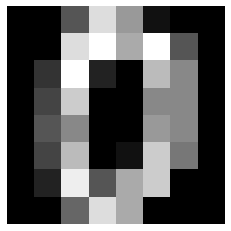

In [3]:
plt.imshow(X[0].reshape(8, 8), cmap='gray');# 下面完成灰度图的绘制
# 灰度显示图像
plt.axis('off')# 关闭坐标轴
print('The digit in the image is {}'.format(y[0]))# 格式化打印

In machine learning, we should evaluate our model by training and testing it on distinct sets of data. `train_test_split` is a utility function to split the data into two independent sets. The `stratify` parameter enforces the classes distribution of the train and test datasets to be the same than the one of the entire dataset.

在机器学习中，我们应该通过在不同的数据集上进行训练和测试来评估我们的模型。`train_test_split` 是一个用于将数据拆分为两个独立数据集的效用函数。`stratify`参数可强制将训练和测试数据集的类分布与整个数据集的类分布相同。

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 划分数据为训练集与测试集,添加stratify参数，以使得训练和测试数据集的类分布与整个数据集的类分布相同。

Once we have independent training and testing sets, we can learn a machine learning model using the `fit` method. We will use the `score` method to test this method, relying on the default accuracy metric.

一旦我们拥有独立的培训和测试集，我们就可以使用`fit`方法学习机器学习模型。 我们将使用`score`方法来测试此方法，依赖于默认的准确度指标。

In [5]:
from sklearn.linear_model import LogisticRegression# 求出Logistic回归的精确度得分

clf = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=5000, random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.96


The API of `scikit-learn` is consistent across classifiers. Thus, we can easily replace the `LogisticRegression` classifier by a `RandomForestClassifier`. These changes are minimal and only related to the creation of the classifier instance.

`scikit-learn`的API在分类器中是一致的。因此，我们可以通过`RandomForestClassifier`轻松替换`LogisticRegression`分类器。这些更改很小，仅与分类器实例的创建有关。

In [6]:
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier轻松替换LogisticRegression分类器
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the RandomForestClassifier is 0.96


#### Exercise

Do the following exercise:

#### 练习
完成接下来的练习：

* Load the breast cancer dataset. Import the functions `load_breast_cancer` from `sklearn.datasets`
* 加载乳腺癌数据集。从`sklearn.datasets`导入函数`load_breast_cancer`。


In [7]:
# %load solutions/01_1_solutions.py
from sklearn.datasets import load_breast_cancer

X_breast, y_breast = load_breast_cancer(return_X_y=True)


* Split the dataset to keep 30% of it for testing using `sklearn.model_selection.train_test_split`. Make sure to stratify the data (i.e., use the `stratify` parameter) and set the `random_state` to `0`.
* 使用`sklearn.model_selection.train_test_split`拆分数据集并保留30％的数据集以进行测试。确保对数据进行分层（即使用 `stratify`参数）并将`random_state`设置为`0`。

In [8]:
# %load solutions/01_2_solutions.py
from sklearn.model_selection import train_test_split

X_breast_train, X_breast_test, y_breast_train, y_breast_test = train_test_split(X_breast, y_breast, stratify=y_breast, random_state=0, test_size=0.3)


* Train a supervised classifier using the training data.
* 使用训练数据训练监督分类器。

In [9]:
# %load solutions/01_3_solutions.py
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
clf.fit(X_breast_train, y_breast_train)


GradientBoostingClassifier(random_state=0)

* Use the fitted classifier to predict the classification labels for the testing set.
* 使用拟合分类器预测测试集的分类标签。

In [10]:
# %load solutions/01_4_solutions.py
y_pred = clf.predict(X_breast_test)


* Compute the balanced accuracy on the testing set. You need to import `balanced_accuracy_score` from `sklearn.metrics`
* 计算测试集的`balanced_accuracy_score`精度。您需要从`sklearn.metrics`导入`balanced_accuracy_score`.

In [11]:
# %load solutions/01_5_solutions.py
from sklearn.metrics import balanced_accuracy_score

accuracy = balanced_accuracy_score(y_breast_test, y_pred)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))


Accuracy score of the GradientBoostingClassifier is 0.94


## 2. More advanced use-case: preprocess the data before training and testing a classifier
## 2.更高级的用例：在训练和测试分类器之前预处理数据

### 2.1 Standardize your data
### 2.1 标准化您的数据

Preprocessing might be required before learning a model. For instance, a user could be interested in creating hand-crafted features or an algorithm might make some apriori assumptions about the data. 

In our case, the solver used by the `LogisticRegression` expects the data to be normalized. Thus, we need to standardize the data before training the model. To observe this necessary condition, we will check the number of iterations required to train the model.

在学习模型之前可能需要预处理。例如，一个用户可能对创建手工制作的特征或者算法感兴趣，那么他可能会对数据进行一些先验假设。

在我们的例子中，`LogisticRegression`使用的求解器期望数据被规范化。因此，我们需要在训练模型之前标准化数据。为了观察这个必要条件，我们将检查训练模型所需的迭代次数。

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000, random_state=42)
clf.fit(X_train, y_train)
print('{} required {} iterations to be fitted'.format(clf.__class__.__name__, clf.n_iter_[0]))

LogisticRegression required 2153 iterations to be fitted


The `MinMaxScaler` transformer is used to normalise the data. This scaler should be applied in the following way: learn (i.e., `fit` method) the statistics on a training set and standardize (i.e., `transform` method) both the training and testing sets. Finally, we will train and test the model and the scaled datasets.

`MinMaxScaler`变换器用于规范化数据。该标量应该以下列方式应用：学习（即，`fit`方法）训练集上的统计数据并标准化（即，`transform`方法）训练集和测试集。 最后，我们将训练和测试这个模型并得到归一化后的数据集。

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)
accuracy = clf.score(X_test_scaled, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))
print('{} required {} iterations to be fitted'.format(clf.__class__.__name__, clf.n_iter_[0]))

Accuracy score of the LogisticRegression is 0.96
LogisticRegression required 186 iterations to be fitted


By scaling the data, the convergence of the model happened much faster than with the unscaled data.

通过归一化数据，模型的收敛速度要比未归一化的数据快得多。(迭代次数变少了)

### 2.2 The wrong preprocessing patterns
### 2.2 错误的预处理模式


We highlighted how to preprocess and adequately train a machine learning model. It is also interesting to spot what would be the wrong way of preprocessing data. There are two potential mistakes which are easy to make but easy to spot.

我们强调了如何预处理和充分训练机器学习模型。发现预处理数据的错误方法也很有趣。其中有两个潜在的错误，易于犯错但又很容易发现。


The first pattern is to standardize the data before spliting the full set into training and testing sets.


第一种模式是在整个数据集分成训练和测试集之前标准化数据。

In [14]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train_prescaled, X_test_prescaled, y_train_prescaled, y_test_prescaled = train_test_split(
    X_scaled, y, stratify=y, random_state=42)

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42)
clf.fit(X_train_prescaled, y_train_prescaled)
accuracy = clf.score(X_test_prescaled, y_test_prescaled)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.96


The second pattern is to standardize the training and testing sets independently. It comes back to call the `fit` methods on both training and testing sets. Thus, the training and testing sets are standardized differently.

第二种模式是独立地标准化训练和测试集。它回来在训练和测试集上调用`fit`方法。因此，训练和测试集的标准化不同。

In [15]:
scaler = MinMaxScaler()
X_train_prescaled = scaler.fit_transform(X_train)
X_test_prescaled = scaler.fit_transform(X_test)

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42)
clf.fit(X_train_prescaled, y_train)
accuracy = clf.score(X_test_prescaled, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.96


### 2.3 Keep it simple, stupid: use the pipeline connector from `scikit-learn`
### 2.3 保持简单，笨的方法：使用`scikit-learn`的管道连接器

The two previous patterns are an issue with data leaking. However, this is difficult to prevent such a mistake when one has to do the preprocessing by hand. Thus, `scikit-learn` introduced the `Pipeline` object. It sequentially connects several transformers and a classifier (or a regressor). We can create a pipeline as:

前面提到的两个模式是数据泄漏的问题。然而，当必须手动进行预处理时，很难防止这种错误。因此,`scikit-learn`引入了`Pipeline`对象。它依次连接多个转换器和分类器（或回归器）。我们可以创建一个如下管道：

In [16]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                       ('clf', LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42))])

We see that this pipeline contains the parameters of both the scaler and the classifier. Sometimes, it can be tedious to give a name to each estimator in the pipeline. `make_pipeline` will give a name automatically to each estimator which is the lower case of the class name.

我们看到这个管道包含了缩放器(归一化)和分类器的参数。 有时，为管道中的每个估计器命名可能会很繁琐。 而`make_pipeline`将自动为每个估计器命名，这是类名的小写。

In [17]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, max_iter=1000))

The pipeline will have an identical API. We use `fit` to train the classifier and `score` to check the accuracy. However, calling `fit` will call the method `fit_transform` of all transformers in the pipeline. Calling `score` (or `predict` and `predict_proba`) will call internally `transform` of all transformers in the pipeline. It corresponds to the normalization procedure in Sect. 2.1.

管道将具有相同的API。 我们使用`fit`来训练分类器和`socre`来检查准确性。 然而，调用`fit`会调用管道中所有变换器的`fit_transform`方法。 调用`score`（或`predict`和`predict_proba`）将调用管道中所有转换器的内部变换。 它对应于本文2.1中的规范化过程。

In [18]:
pipe.fit(X_train, y_train)
accuracy = pipe.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(pipe.__class__.__name__, accuracy))

Accuracy score of the Pipeline is 0.96


We can check all the parameters of the pipeline using `get_params()`.

我们可以使用`get_params()`检查管道的所有参数。

In [19]:
pipe.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('logisticregression', LogisticRegression(max_iter=1000, random_state=42))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'logisticregression': LogisticRegression(max_iter=1000, random_state=42),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 1000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 42,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

#### Exercise

Reuse the breast dataset of the first exercise to train a `SGDClassifier` which you can import from `linear_model`. Make a pipeline with this classifier and a `StandardScaler` transformer imported from `sklearn.preprocessing`. Train and test this pipeline.

### 练习
重用第一个练习的乳腺癌数据集来训练,可以从`linear_model`导入`SGDClassifier`。 使用此分类器和从`sklearn.preprocessing`导入的`StandardScaler`变换器来创建管道。然后训练和测试这条管道。

In [20]:
# %load solutions/02_solutions.py
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

pipe = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000))
pipe.fit(X_breast_train, y_breast_train)
y_pred = pipe.predict(X_breast_test)
accuracy = balanced_accuracy_score(y_breast_test, y_pred)
print('Accuracy score of the {} is {:.2f}'.format(pipe.__class__.__name__, accuracy))


Accuracy score of the Pipeline is 0.96


## 3. When more is better than less: cross-validation instead of single split
### 3.当更多优于更少时：交叉验证而不是单独拆分

Splitting the data is necessary to evaluate the statistical model performance. However, it reduces the number of samples which can be used to learn the model. Therefore, one should use cross-validation whenever possible. Having multiple splits will give information about the model stability as well. 

`scikit-learn` provides three functions: `cross_val_score`, `cross_val_predict`, and [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html). The latter provides more information regarding fitting time, training and testing scores. I can also return multiple scores at once.

分割数据对于评估统计模型性能是必要的。 但是，它减少了可用于学习模型的样本数量。 因此，应尽可能使用交叉验证。有多个拆分也会提供有关模型稳定性的信息。

`scikit-learn`提供了三个函数：`cross_val_score`，`cross_val_predict`和`cross_validate`。 后者提供了有关拟合时间，训练和测试分数的更多信息。 我也可以一次返回多个分数。

In [21]:
from sklearn.model_selection import cross_validate

pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='lbfgs', multi_class='auto',
                                        max_iter=1000, random_state=42))
scores = cross_validate(pipe, X, y, cv=3, return_train_score=True)

Using the cross-validate function, we can quickly check the training and testing scores and make a quick plot using `pandas`.

使用交叉验证函数，我们可以快速检查训练和测试分数，并使用`pandas`快速绘图。

In [22]:
import pandas as pd

df_scores = pd.DataFrame(scores)
df_scores

,fit_time,score_time,test_score,train_score
0,0.243102,0.000999,0.926544,0.988314
1,0.199905,0.000998,0.943239,0.984975
2,0.200671,0.000996,0.924875,0.993322


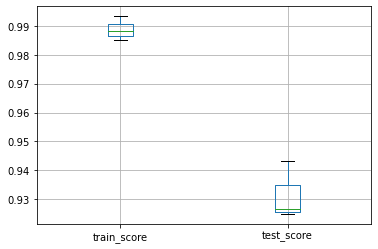

In [23]:
df_scores[['train_score', 'test_score']].boxplot()

#### Exercise

Use the pipeline of the previous exercise and make a cross-validation instead of a single split evaluation.

#### 练习
使用上一个练习的管道并进行交叉验证，而不是单个拆分评估。

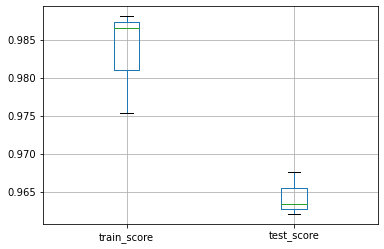

In [24]:
# %load solutions/03_solutions.py
pipe = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000))
scores = cross_validate(pipe, X_breast, y_breast, scoring='balanced_accuracy', cv=3, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores[['train_score', 'test_score']].boxplot()


## 4. Hyper-parameters optimization: fine-tune the inside of a pipeline

## 4.超参数优化：微调管道内部

Sometimes you would like to find the parameters of a component of the pipeline which lead to the best accuracy. We already saw that we could check the parameters of a pipeline using `get_params()`.

有时您希望找到管道组件的参数，从而获得最佳精度。 我们已经看到我们可以使用`get_params()`检查管道的参数。

In [25]:
pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('sgdclassifier', SGDClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'sgdclassifier': SGDClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'sgdclassifier__alpha': 0.0001,
 'sgdclassifier__average': False,
 'sgdclassifier__class_weight': None,
 'sgdclassifier__early_stopping': False,
 'sgdclassifier__epsilon': 0.1,
 'sgdclassifier__eta0': 0.0,
 'sgdclassifier__fit_intercept': True,
 'sgdclassifier__l1_ratio': 0.15,
 'sgdclassifier__learning_rate': 'optimal',
 'sgdclassifier__loss': 'hinge',
 'sgdclassifier__max_iter': 1000,
 'sgdclassifier__n_iter_no_change': 5,
 'sgdclassifier__n_jobs': None,
 'sgdclassifier__penalty': 'l2',
 'sgdclassifier__power_t': 0.5,
 'sgdclassifier__random_state': None,
 'sgdclassifier__shuffle': True,
 'sgdclassifier__tol': 0.001,
 'sgdclassifier__validation_fraction': 0.1,
 'sgdclassifier__verbose': 0,


Hyper-parameters can be optimized by an exhaustive search. [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) provides such utility and does a cross-validated grid-search over a parameter grid.

Let's give an example in which we would like to optimize the `C` and `penalty` parameters of the `LogisticRegression` classifier.

可以通过穷举搜索来优化超参数。`GridSearchCV`提供此类实用程序，并通过参数网格进行交叉验证的网格搜索。

如下例子，我们希望优化`LogisticRegression`分类器的`C`和`penalty`参数。

In [26]:
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='saga', multi_class='auto',
                                        random_state=42, max_iter=5000))
param_grid = {'logisticregression__C': [0.1, 1.0, 10],
              'logisticregression__penalty': ['l2', 'l1']}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=5000,
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1.0, 10],
                         'logisticregression__penalty': ['l2', 'l1']},
             return_train_score=True)

When fitting the grid-search object, it finds the best possible parameter combination on the training set (using cross-validation). We can introspect the results of the grid-search by accessing the attribute `cv_results_`. It allows us to check the effect of the parameters on the model performance.

在拟合网格搜索对象时，它会在训练集上找到最佳的参数组合（使用交叉验证）。 我们可以通过访问属性`cv_results_`来得到网格搜索的结果。 通过这个属性允许我们可以检查参数对模型性能的影响

In [27]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.392578,0.018177,0.009758,0.002593,0.1,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.953229,0.935412,0.942094,0.943578,0.007349,5,0.953229,0.957684,0.952116,0.954343,0.002406
1,1.235161,0.331036,0.004532,0.003174,0.1,l1,"{'logisticregression__C': 0.1, 'logisticregres...",0.886414,0.906459,0.884187,0.892353,0.010015,6,0.903118,0.902004,0.902004,0.902376,0.000525
2,1.659106,0.053197,0.000994,0.000034,1,l2,"{'logisticregression__C': 1.0, 'logisticregres...",0.979955,0.955457,0.957684,0.964365,0.011061,2,0.984410,0.988864,0.986637,0.986637,0.001818
3,5.901105,0.727088,0.001680,0.000483,1,l1,"{'logisticregression__C': 1.0, 'logisticregres...",0.964365,0.951002,0.944321,0.953229,0.008333,4,0.977728,0.978842,0.982183,0.979584,0.001893
4,3.889626,0.337160,0.001813,0.001151,10,l2,"{'logisticregression__C': 10, 'logisticregress...",0.977728,0.964365,0.964365,0.968820,0.006299,1,1.000000,1.000000,1.000000,1.000000,0.000000
5,13.795742,0.817781,0.000894,0.000177,10,l1,"{'logisticregression__C': 10, 'logisticregress...",0.973274,0.957684,0.951002,0.960653,0.009332,3,1.000000,1.000000,1.000000,1.000000,0.000000


By default, the grid-search object is also behaving as an estimator. Once it is fitted, calling `score` will fix the hyper-parameters to the best parameters found.

默认情况下，网格搜索对象也表现为估计器。 一旦它被`fit`后，调用`score`将超参数固定为找到的最佳参数。

In [28]:
grid.best_params_

{'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}

Besides this is possible to call the grid-search as any other classifier to make predictions.

此外，可以将网格搜索称为任何其他分类器以进行预测。

In [29]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.96


Up to know, we only make the fitting of the grid-search on a single split. However, as previously stated, we might be interested to make an outer cross-validation to estimate the performance of the model and different sample of data and check the potential variation in performance. Since grid-search is an estimator, we can use it directly within the `cross_validate` function.

最重要的是，我们只对单个分割进行网格搜索。 但是，如前所述，我们可能有兴趣进行外部交叉验证，以估计模型的性能和不同的数据样本，并检查性能的潜在变化。 由于网格搜索是一个估计器，我们可以直接在`cross_validate`函数中使用它。

In [30]:
scores = cross_validate(grid, X, y, cv=3, n_jobs=-1, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores

,fit_time,score_time,test_score,train_score
0,75.876026,0.001996,0.928214,0.985810
1,77.781743,0.000999,0.946578,0.997496
2,70.402801,0.001995,0.924875,0.993322


#### Exercise

Reuse the previous pipeline for the breast dataset and make a grid-search to evaluate the difference between a `hinge` and `log` loss. Besides, fine-tune the `penalty`.

#### 练习
重复使用乳腺癌数据集的先前管道并进行网格搜索以评估`hinge`(铰链) 和`log`(对数)损失之间的差异。此外，微调`penalty`。

{'sgdclassifier__loss': 'hinge', 'sgdclassifier__penalty': 'l2'}


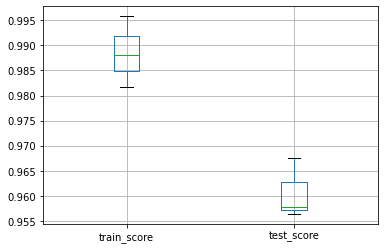

In [31]:
# %load solutions/04_solutions.py
pipe = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000))
param_grid = {'sgdclassifier__loss': ['hinge', 'log'],
              'sgdclassifier__penalty': ['l2', 'l1']}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1)
scores = cross_validate(grid, X_breast, y_breast, scoring='balanced_accuracy', cv=3, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores[['train_score', 'test_score']].boxplot()

grid.fit(X_breast_train, y_breast_train)
print(grid.best_params_)


## 5. Summary: my scikit-learn pipeline in less than 10 lines of code (skipping the import statements)
## 5.总结：我的scikit-learn管道只有不到10行代码（跳过import语句）

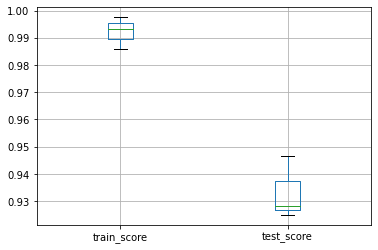

In [32]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='saga', multi_class='auto', random_state=42, max_iter=5000))
param_grid = {'logisticregression__C': [0.1, 1.0, 10],
              'logisticregression__penalty': ['l2', 'l1']}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1)
scores = pd.DataFrame(cross_validate(grid, X, y, cv=3, n_jobs=-1, return_train_score=True))
scores[['train_score', 'test_score']].boxplot()

# 6. Heterogeneous data: when you work with data other than numerical
# 6.异构数据：当您使用数字以外的数据时

Up to now, we used `scikit-learn` to train model using numerical data.

到目前为止，我们使用`scikit-learn`来训练使用数值数据的模型。

In [33]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

`X` is a NumPy array of `float` values only. However, datasets can contains mixed types.

`X`是仅包含浮点值的`NumPy`数组。 但是，数据集可以包含混合类型。

In [34]:
import os
data = pd.read_csv(os.path.join('data', 'titanic_openml.csv'), na_values='?')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


The `titanic` dataset contains both categorical, text, and numeric features. We will use this dataset to predict whether a passenger survived the Titanic or not. 

Let's split the data into training and testing sets and use the `survived` column as a target.

泰坦尼克号数据集包含分类，文本和数字特征。 我们将使用此数据集来预测乘客是否在泰坦尼克号中幸存下来。

让我们将数据拆分为训练和测试集，并将幸存列用作目标。

In [35]:
y = data['survived']
X = data.drop(columns='survived')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

One could try a `LogisticRegression` classifier and see how good it is performing.

首先，可以尝试使用`LogisticRegression`分类器，看看它的表现有多好。

In [38]:
clf = LogisticRegression()
#clf.fit(X_train, y_train)#这里肯定会报错。

Whoops, most of the classifiers are designed to work with numerical data. Therefore, we need to convert the categorical data into numeric features. The simplest way is to one-hot encode each categorical feature with the `OneHotEncoder`. Let's give an example for the `sex` and `embarked` columns. Note that we also encounter some data which are missing. We will use a `SimpleImputer` to replace the missing values with a constant values.

哎呀，大多数分类器都设计用于处理数值数据。 因此，我们需要将分类数据转换为数字特征。 最简单的方法是使用`OneHotEncoder`对每个分类特征进行读热编码。 让我们以`sex`与`embarked`列为例。 请注意，我们还会遇到一些缺失的数据。 我们将使用`SimpleImputer`用常量值替换缺失值。

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
ohe = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder())
X_encoded = ohe.fit_transform(X_train[['sex', 'embarked']])
X_encoded.toarray()

array([[0., 1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.]])

This way, it is possible to encode the categorical features. However, we also want to standardize the numerical features. Thus, we need to split the original data into 2 subgroups and apply a different preprocessing: (i) one-hot encoding for the categorical data and (ii) standard scaling for the numerical data. We also need to handle missing values in both cases. For the categorical column, we replace the missing values by the string `'missing_values'` which will be interpreted as a category on its own. For the numerical data, we will replace the missing data by the mean values of the feature of interest.

这样，可以对分类特征进行编码。 但是，我们也希望标准化数字特征。 因此，我们需要将原始数据分成2个子组并应用不同的预处理：（i）分类数据的独热编；（ii）数值数据的标准缩放(归一化)。 我们还需要处理两种情况下的缺失值： 对于分类列，我们将字符串'`missing_values`'替换为缺失值，该字符串将自行解释为类别。 对于数值数据，我们将用感兴趣的特征的平均值替换缺失的数据。

In [40]:
col_cat = ['sex', 'embarked']
col_num = ['age', 'sibsp', 'parch', 'fare']

X_train_cat = X_train[col_cat]
X_train_num = X_train[col_num]
X_test_cat = X_test[col_cat]
X_test_num = X_test[col_num]

In [41]:
from sklearn.preprocessing import StandardScaler

scaler_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder())
X_train_cat_enc = scaler_cat.fit_transform(X_train_cat)
X_test_cat_enc = scaler_cat.transform(X_test_cat)

scaler_num = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
X_train_num_scaled = scaler_num.fit_transform(X_train_num)
X_test_num_scaled = scaler_num.transform(X_test_num)

We should apply these transformations on the training and testing sets as we did in Sect. 2.1

我们应该像在本文2.1中那样在训练和测试集上应用这些变换。

In [42]:
import numpy as np
from scipy import sparse

X_train_scaled = sparse.hstack((X_train_cat_enc,
                                sparse.csr_matrix(X_train_num_scaled)))
X_test_scaled = sparse.hstack((X_test_cat_enc,
                               sparse.csr_matrix(X_test_num_scaled)))

Once the transformation is done, we can combine the informations which are all numerical now. Finally, we use our `LogisticRegression` classifier as a model.

转换完成后，我们现在可以组合所有数值的信息。最后，我们使用`LogisticRegression`分类器作为模型。

In [43]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train_scaled, y_train)
accuracy = clf.score(X_test_scaled, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.79


The above pattern of first transforming the data and then fitting/scoring the classifier is exactly the one of Sect. 2.1. Therefore, we would like to use a pipeline for such purpose. However, we would also like to have different processing on different columns of our matrix. The `ColumnTransformer` transformer or the `make_column_transformer` function should be used. It is used to automatically apply different pipeline on different columns.

上面首先转换数据然后拟合/评分分类器的模式恰好是本节2.1的模式之一。因此，我们希望为此目的使用管道。但是，我们还希望对矩阵的不同列进行不同的处理。应使用`ColumnTransformer`转换器或`make_column_transformer`函数。它用于在不同的列上自动应用不同的管道。

In [44]:
from sklearn.compose import make_column_transformer

pipe_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore'))
pipe_num = make_pipeline(SimpleImputer(), StandardScaler())
preprocessor = make_column_transformer((col_cat, pipe_cat), (col_num, pipe_num))

pipe = make_pipeline(preprocessor, LogisticRegression(solver='lbfgs'))

pipe.fit(X_train, y_train)
accuracy = pipe.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(pipe.__class__.__name__, accuracy))

TypeError: All estimators should implement fit and transform, or can be 'drop' or 'passthrough' specifiers. '['sex', 'embarked']' (type <class 'list'>) doesn't.

Besides, it can also be used in another pipeline. Thus, we will be able to use all `scikit-learn` utilities as `cross_validate` or `GridSearchCV`.

此外，它还可以被使用在另一个管道。 因此，我们将能够使用所有`scikit-learn`实用程序作为`cross_validate`或`GridSearchCV`。

In [45]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('list-1', ['sex', 'embarked'],
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))])),
                                   ('list-2', ['age', 'sibsp', 'parch', 'fare'],
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]))])),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('list-1', ['sex', 'embarked'],
                               

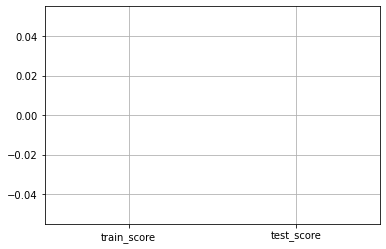

In [46]:
pipe_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore'))
pipe_num = make_pipeline(StandardScaler(), SimpleImputer())
preprocessor = make_column_transformer((col_cat, pipe_cat), (col_num, pipe_num))

pipe = make_pipeline(preprocessor, LogisticRegression(solver='lbfgs'))

param_grid = {'columntransformer__pipeline-2__simpleimputer__strategy': ['mean', 'median'],
              'logisticregression__C': [0.1, 1.0, 10]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
scores = pd.DataFrame(cross_validate(grid, X, y, scoring='balanced_accuracy', cv=5, n_jobs=-1, return_train_score=True))
scores[['train_score', 'test_score']].boxplot()

#### Exercise

Do the following exercise:

Load the adult dataset located in `./data/adult_openml.csv`. Make your own `ColumnTransformer` preprocessor. Pipeline it with a classifier. Fine tune it and check the prediction accuracy within a cross-validation.

#### 练习
完成接下来的练习：

加载位于`./data/adult_openml.csv`中的成人数据集。 制作自己的`ColumnTransformer`预处理器，并用分类器管道化它。对其进行微调并在交叉验证中检查预测准确性。

* Read the adult dataset located in `./data/adult_openml.csv` using `pd.read_csv`.

* 使用`pd.read_csv`读取位于`./data/adult_openml.csv`中的成人数据集。

In [47]:
# %load solutions/05_1_solutions.py
import os
import pandas as pd

data = pd.read_csv(os.path.join('data', 'adult_openml.csv'))


In [48]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
48838,4,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,2,United-States,<=50K
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K


* Split the datasets into a data and a target. The target corresponds to the `class` column. For the data, drop the columns `fnlwgt`, `capitalgain`, and `capitalloss`.

* 将数据集拆分为数据和目标。 目标对应于类列。 对于数据，删除列`fnlwgt`，`capitalgain`和`capitalloss`。

In [49]:
# %load solutions/05_2_solutions.py
y = data['class']
X = data.drop(columns=['class', 'fnlwgt', 'capitalgain', 'capitalloss'])


In [50]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hoursperweek,native-country
0,2,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2,United-States
1,3,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,United-States
2,2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,2,United-States
3,3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,2,United-States
4,1,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,2,Cuba
...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,2,United-States
48838,4,?,HS-grad,9,Widowed,?,Other-relative,Black,Male,2,United-States
48839,2,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,3,United-States
48840,2,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,United-States


In [51]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48837    <=50K
48838    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: class, Length: 48842, dtype: object

* The target is not encoded. Use the `sklearn.preprocessing.LabelEncoder` to encode the class.

* 目标未编码。使用`sklearn.preprocessing.LabelEncoder`对类进行编码。

In [52]:
# %load solutions/05_3_solutions.py
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [53]:
y

array([0, 0, 0, ..., 0, 0, 1])

* Create a list containing the name of the categorical columns. Similarly, do the same for the numerical data.

* 创建一个包含分类列名称的列表。 同样，对数值数据也一样。

In [54]:
# %load solutions/05_4_solutions.py
col_cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'sex']
col_num = ['age', 'hoursperweek']


* Create a pipeline to one-hot encode the categorical data. Use the `KBinsDiscretizer` for the numerical data. Import it from `sklearn.preprocessing`.
* 创建一个管道以对分类数据进行读热编码。 使用`KBinsDiscretizer`作为数值数据。 从`sklearn.preprocessing`导入它。

In [55]:
# %load solutions/05_5_solutions.py
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer

pipe_cat = OneHotEncoder(handle_unknown='ignore')
pipe_num = KBinsDiscretizer()


* Create a `preprocessor` by using the `make_column_transformer`. You should apply the good pipeline to the good column.
* 使用`make_column_transformer`创建预处理器。 您应该将好的管道应用于好的列。

In [56]:
# %load solutions/05_6_solutions.py
from sklearn.compose import make_column_transformer
preprocessor = make_column_transformer((col_cat, pipe_cat, ), (col_num, pipe_num))


* Pipeline the preprocessor with a `LogisticRegression` classifier. Subsequently define a grid-search to find the best parameter `C`. Train and test this workflow in a cross-validation scheme using `cross_validate`.

* 使用`LogisticRegression`分类器对预处理器进行管道传输。 随后定义网格搜索以找到最佳参数`C`.使用`cross_validate`在交叉验证方案中训练和测试此工作流程。

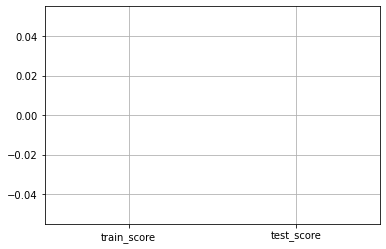

In [57]:
# %load solutions/05_7_solutions.py
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

pipe = make_pipeline(preprocessor, LogisticRegression(solver='lbfgs', max_iter=1000))
param_grid = {'logisticregression__C': [0.1, 1.0, 10]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
scores = pd.DataFrame(cross_validate(grid, X, y, scoring='balanced_accuracy', cv=3, n_jobs=-1, return_train_score=True))
scores[['train_score', 'test_score']].boxplot(whis=10)
